# Pymaceuticals Inc.
---

### Analysis

-  I noticed that heavier mice generally have larger tumor volumes, suggesting a possible link between weight and tumor growth.
-  There’s a lot of variation in tumor volume for mice of the same weight, which means other factors could be affecting tumor growth besides weight.
-  From the pie charts, I can see that the study includes a near-equal number of male and female mice, which helps ensure that gender doesn't heavily influence the study's results
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
 
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='outer', on = "Mouse ID")

# Display the data table for preview
combined_df.head

<bound method NDFrame.head of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_mon

In [56]:
# Checking the number of mice.
mice_data = combined_df["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dupes = combined_df[combined_df[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dupes_data = combined_df.loc[combined_df["Mouse ID"] == mice_dupes_id[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice


249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()

drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,
                                 "Median Tumor Volume":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})
drug_reg_sum_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

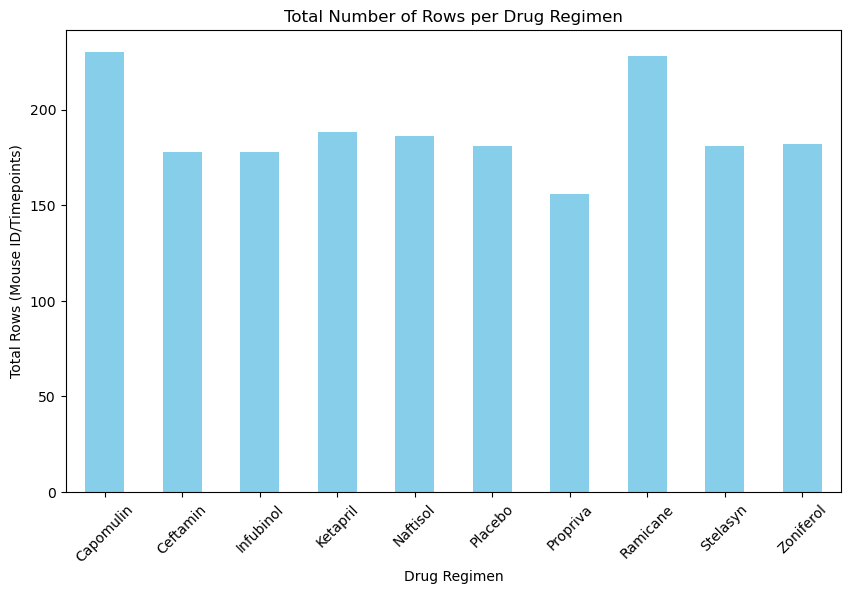

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_total_data.groupby('Drug Regimen').size()

drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Total Number of Rows per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()


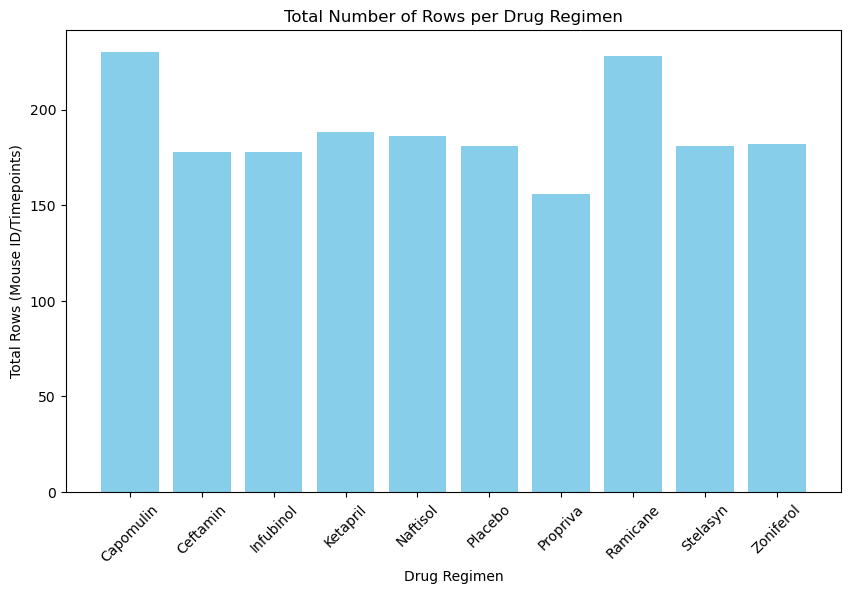

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_total_data.groupby('Drug Regimen').size()

plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue')
plt.title("Total Number of Rows per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

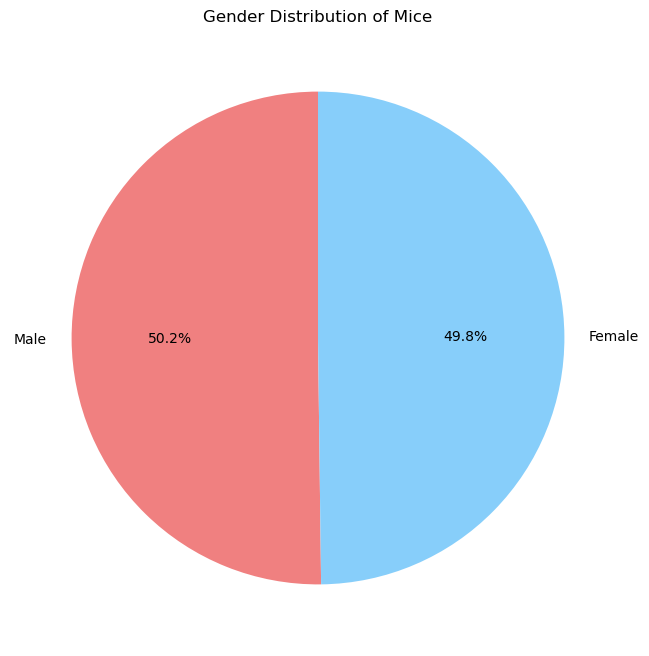

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_total_data[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'], title="Gender Distribution of Mice")
plt.ylabel('')
plt.show()


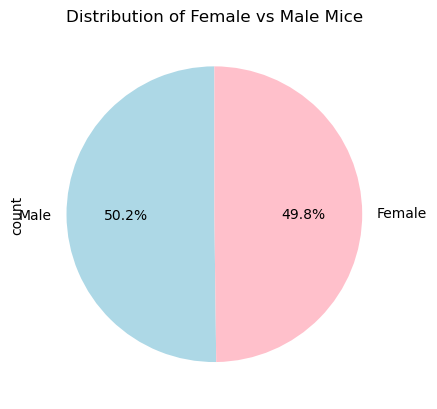

In [35]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = clean_total_data[["Mouse ID", "Sex"]].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90, legend=False)
plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = clean_total_data[clean_total_data["Drug Regimen"].isin(treatment_regimens)]
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, clean_total_data, on=["Mouse ID", "Timepoint"])
final_tumor_volumes = last_timepoint_df.pivot_table(index="Mouse ID", columns="Drug Regimen", values="Tumor Volume (mm3)")


final_tumor_volumes.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,
a203,NaN,NaN,67.973419,NaN
a251,NaN,NaN,65.525743,NaN
a275,NaN,62.999356,NaN,NaN
a411,NaN,NaN,NaN,38.407618
a444,NaN,NaN,NaN,43.047543


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = clean_total_data[clean_total_data["Drug Regimen"] == treatment]
    tumor_volumes_data = treatment_data["Tumor Volume (mm3)"]
    
    # add subset
    tumor_volumes.append(tumor_volumes_data)
    
    # Determine outliers using upper and lower bounds
    Q1 = tumor_volumes_data.quantile(0.25)
    Q3 = tumor_volumes_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = tumor_volumes_data[(tumor_volumes_data < lower_bound) | (tumor_volumes_data > upper_bound)]
    print(f"{treatment} - IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Potential outliers: {outliers}\n")



Capomulin - IQR: 7.314067135000002
Lower bound: 26.714832162499995, Upper bound: 55.9711007025
Potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane - IQR: 8.325365415
Lower bound: 24.1865864625, Upper bound: 57.488048122500004
Potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol - IQR: 10.002090667500006
Lower bound: 32.309217298749985, Upper bound: 72.31757996875001
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin - IQR: 9.593010457500007
Lower bound: 32.81891142624998, Upper bound: 71.19095325625001
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



C:\Users\jayla\AppData\Local\Temp\ipykernel_24804\3333101936.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments)


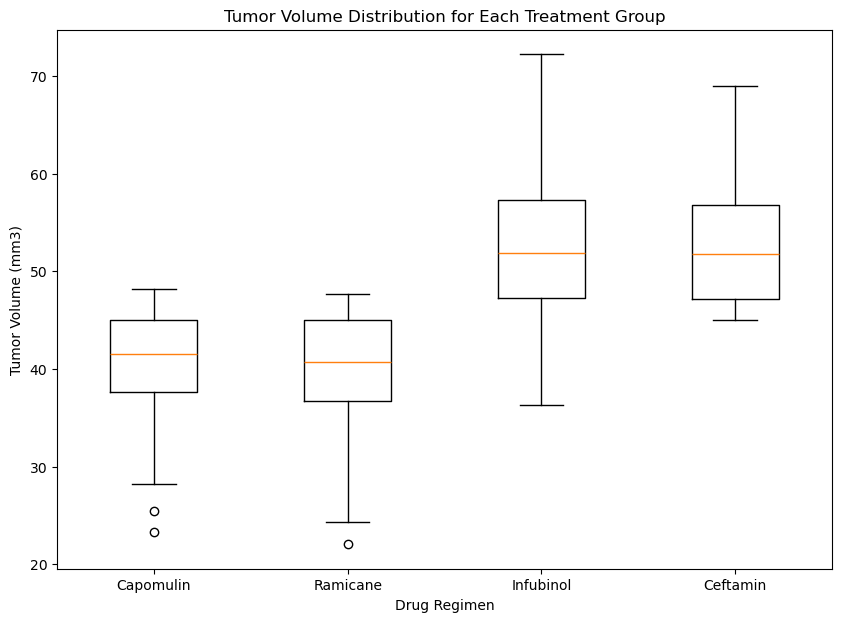

In [53]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 7))
plt.boxplot(tumor_volumes, labels=treatments)
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

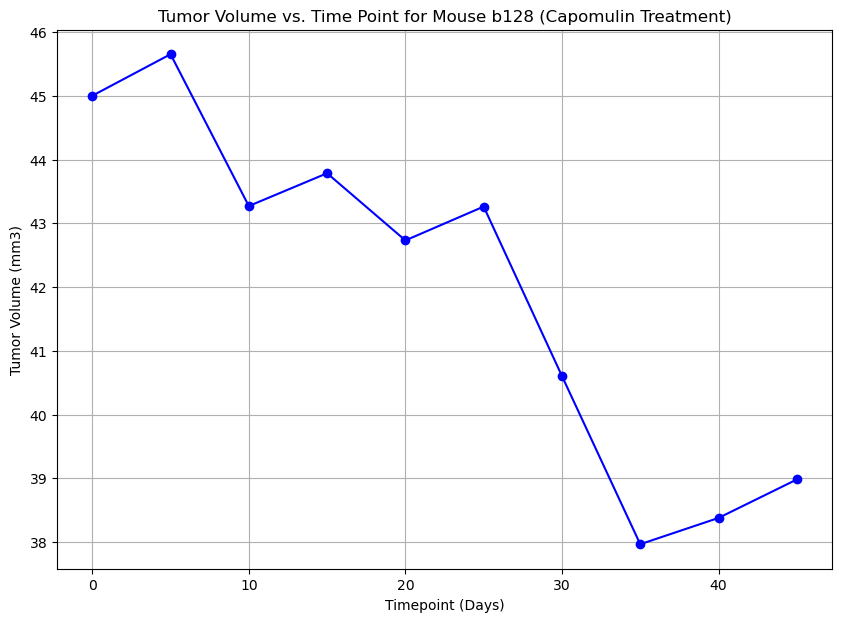

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_total_data[clean_total_data["Drug Regimen"] == "Capomulin"]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "b128"] 

plt.figure(figsize=(10, 7))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', color='b')
plt.title('Tumor Volume vs. Time Point for Mouse b128 (Capomulin Treatment)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


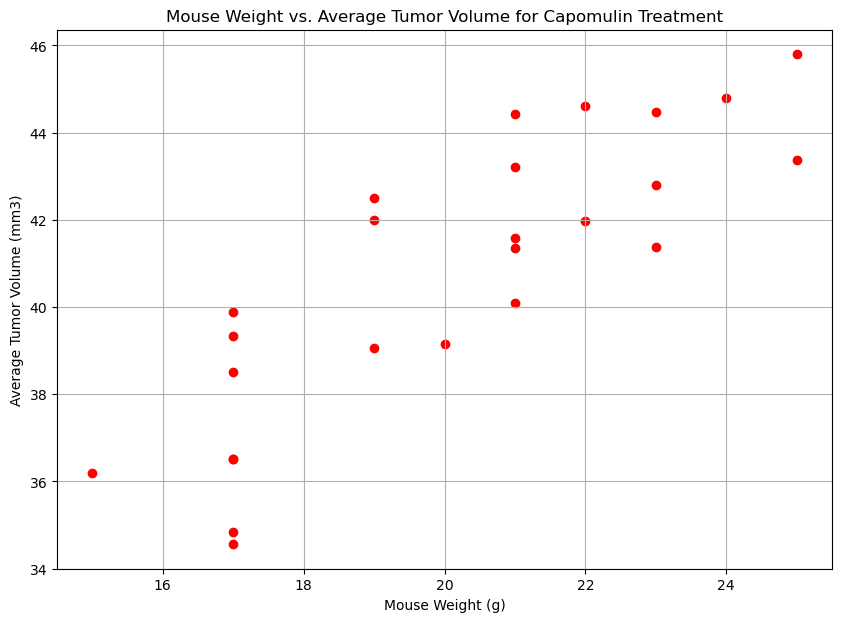

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_total_data[clean_total_data["Drug Regimen"] == "Capomulin"]

avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()  # Take the first weight for each mouse
merged_data = pd.DataFrame({'Mouse Weight (g)': mouse_weights, 'Average Tumor Volume (mm3)': avg_tumor_vol})

plt.figure(figsize=(10, 7))
plt.scatter(merged_data['Mouse Weight (g)'], merged_data['Average Tumor Volume (mm3)'], color='r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()



## Correlation and Regression

Correlation Coefficient: 0.841936342469472


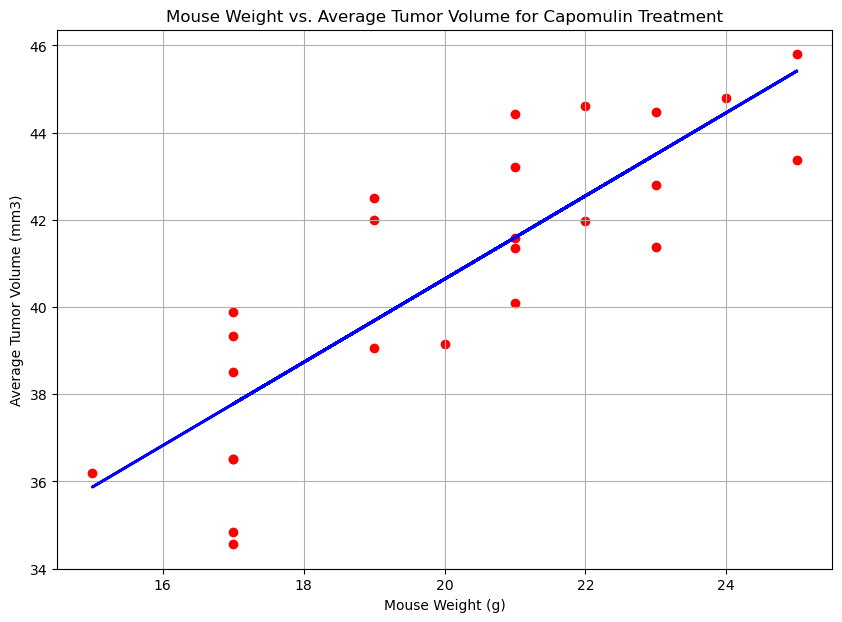

Linear Regression Model: y = 0.95x + 21.55


In [76]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from sklearn.linear_model import LinearRegression

corr_coefficient, _ = pearsonr(merged_data['Mouse Weight (g)'], merged_data['Average Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {corr_coefficient}")

X = merged_data['Mouse Weight (g)'].values.reshape(-1, 1)  # Independent variable (mouse weight)
y = merged_data['Average Tumor Volume (mm3)'].values  # Dependent variable (average tumor volume)

linear_reg = LinearRegression()
linear_reg.fit(X, y)

slope = linear_reg.coef_[0]
intercept = linear_reg.intercept_

regression_line = linear_reg.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(merged_data['Mouse Weight (g)'], merged_data['Average Tumor Volume (mm3)'], color='r')
plt.plot(merged_data['Mouse Weight (g)'], regression_line, color='blue', linewidth=2)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")




